In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [6]:
df=pd.read_excel("Retail.xlsx")
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Transaction_ID         10000 non-null  object        
 1   Customer_ID            10000 non-null  object        
 2   Customer_Name          10000 non-null  object        
 3   Email                  10000 non-null  object        
 4   Gender                 10000 non-null  object        
 5   Age                    10000 non-null  int64         
 6   Country                10000 non-null  object        
 7   City                   10000 non-null  object        
 8   Product_Category       10000 non-null  object        
 9   Product_Name           10000 non-null  object        
 10  Purchase_Amount        10000 non-null  float64       
 11  Discount_Offered       10000 non-null  float64       
 12  Payment_Mode           10000 non-null  object        
 13  Pu

In [7]:
df.head()


,Transaction_ID,Customer_ID,Customer_Name,Email,Gender,Age,Country,City,Product_Category,Product_Name,Purchase_Amount,Discount_Offered,Payment_Mode,Purchase_Date,Delivery_Status,Customer_Satisfaction
0,212b45e9-681c-4478-99bb-22de2fa5fa2e,42c8497d-2de9-4b2c-ae61-f9a093336c0f,Mr. James Patterson,matthewsbryan@hotmail.com,Male,57,Cayman Islands,Lake Tiffany,Books,Sofa,97.50,13.35,UPI,2025-06-10,Returned,2.0
1,3ddf64ac-618a-4fcf-9198-e0dad759d08f,f64c41ae-5269-45d7-9a43-7fd4e061a5e6,James Howard,masseyheather@parsons.com,Female,24,Finland,North Keithborough,Home,Laptop,967.34,21.54,UPI,2024-07-28,Delivered,4.0
2,e04b8bc9-1cd9-48bf-beef-4799a069d688,9b9130ff-c0f5-4782-aad9-377c058eaa1d,Angel Bird,kathy37@hotmail.com,Male,49,Argentina,Port Charles,Home,Shoes,272.69,3.33,Debit Card,2025-02-09,Returned,1.0
3,d0bf9db5-1302-49f5-aa44-aa6830f53dcd,1e811422-9dd4-4377-aae1-0267ed1ad0f7,Alyssa Davis,sarah64@hotmail.com,Male,36,Algeria,West Sonya,Books,Shampoo,693.71,16.34,Cash,2025-01-18,Delivered,3.0
4,e076cef5-e2c1-489a-bd66-f7ef239d5741,908fcb14-8d16-4f87-a91a-5c413a1d0663,Sandra Hernandez,nguyencynthia@jackson.net,Male,23,Albania,Lake Matthewmouth,Beauty,Sofa,100.86,28.82,Debit Card,2024-11-02,Pending,2.0


In [8]:
df.isnull().sum()


Transaction_ID             0
Customer_ID                0
Customer_Name              0
Email                      0
Gender                     0
Age                        0
Country                    0
City                       0
Product_Category           0
Product_Name               0
Purchase_Amount            0
Discount_Offered           0
Payment_Mode               0
Purchase_Date              0
Delivery_Status            0
Customer_Satisfaction    563
dtype: int64

In [9]:
df['Customer_Satisfaction'].value_counts()

Customer_Satisfaction
3.0    2999
2.0    1973
4.0    1912
5.0    1545
1.0    1008
Name: count, dtype: int64

In [10]:
df['Customer_Satisfaction'].describe()

count    9437.000000
mean        3.107343
std         1.217553
min         1.000000
25%         2.000000
50%         3.000000
75%         4.000000
max         5.000000
Name: Customer_Satisfaction, dtype: float64

In [11]:
# Calculate the median of the 'Customer_Satisfaction' column
median_satisfaction = df['Customer_Satisfaction'].median()

# Fill NaN values with the calculated median
df['Customer_Satisfaction'].fillna(median_satisfaction, inplace=True)

print(f"Filled missing 'Customer_Satisfaction' values with median: {median_satisfaction}")
print(df['Customer_Satisfaction'].isnull().sum()) # Should show 0

Filled missing 'Customer_Satisfaction' values with median: 3.0
0


C:\Users\3LOK\AppData\Local\Temp\ipykernel_9380\1517934415.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['Customer_Satisfaction'].fillna(median_satisfaction, inplace=True)


In [12]:
df['Customer_Satisfaction'] = df['Customer_Satisfaction'].astype(int)
print(df['Customer_Satisfaction'].dtype) # This should now output 'int64'
print(df['Customer_Satisfaction'].head()) # Check the first few values


int32
0    2
1    4
2    1
3    3
4    2
Name: Customer_Satisfaction, dtype: int32


In [13]:
# Select all columns with 'object' dtype (which are typically strings)
object_columns = df.select_dtypes(include='object').columns

for col in object_columns:
    df[col] = df[col].str.strip()

print("Spaces stripped from all object columns.")

Spaces stripped from all object columns.


In [14]:
initial_rows = df.shape[0]
df.drop_duplicates(inplace=True)
rows_after_dropping = df.shape[0]

print(f"Initial rows: {initial_rows}")
print(f"Rows after dropping duplicates: {rows_after_dropping}")
print(f"Number of duplicate rows dropped: {initial_rows - rows_after_dropping}")

Initial rows: 10000
Rows after dropping duplicates: 10000
Number of duplicate rows dropped: 0


In [15]:
df.info()

df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 16 columns):
 #   Column                 Non-Null Count  Dtype         
---  ------                 --------------  -----         
 0   Transaction_ID         10000 non-null  object        
 1   Customer_ID            10000 non-null  object        
 2   Customer_Name          10000 non-null  object        
 3   Email                  10000 non-null  object        
 4   Gender                 10000 non-null  object        
 5   Age                    10000 non-null  int64         
 6   Country                10000 non-null  object        
 7   City                   10000 non-null  object        
 8   Product_Category       10000 non-null  object        
 9   Product_Name           10000 non-null  object        
 10  Purchase_Amount        10000 non-null  float64       
 11  Discount_Offered       10000 non-null  float64       
 12  Payment_Mode           10000 non-null  object        
 13  Pu

,Transaction_ID,Customer_ID,Customer_Name,Email,Gender,Age,Country,City,Product_Category,Product_Name,Purchase_Amount,Discount_Offered,Payment_Mode,Purchase_Date,Delivery_Status,Customer_Satisfaction
0,212b45e9-681c-4478-99bb-22de2fa5fa2e,42c8497d-2de9-4b2c-ae61-f9a093336c0f,Mr. James Patterson,matthewsbryan@hotmail.com,Male,57,Cayman Islands,Lake Tiffany,Books,Sofa,97.50,13.35,UPI,2025-06-10,Returned,2
1,3ddf64ac-618a-4fcf-9198-e0dad759d08f,f64c41ae-5269-45d7-9a43-7fd4e061a5e6,James Howard,masseyheather@parsons.com,Female,24,Finland,North Keithborough,Home,Laptop,967.34,21.54,UPI,2024-07-28,Delivered,4
2,e04b8bc9-1cd9-48bf-beef-4799a069d688,9b9130ff-c0f5-4782-aad9-377c058eaa1d,Angel Bird,kathy37@hotmail.com,Male,49,Argentina,Port Charles,Home,Shoes,272.69,3.33,Debit Card,2025-02-09,Returned,1
3,d0bf9db5-1302-49f5-aa44-aa6830f53dcd,1e811422-9dd4-4377-aae1-0267ed1ad0f7,Alyssa Davis,sarah64@hotmail.com,Male,36,Algeria,West Sonya,Books,Shampoo,693.71,16.34,Cash,2025-01-18,Delivered,3
4,e076cef5-e2c1-489a-bd66-f7ef239d5741,908fcb14-8d16-4f87-a91a-5c413a1d0663,Sandra Hernandez,nguyencynthia@jackson.net,Male,23,Albania,Lake Matthewmouth,Beauty,Sofa,100.86,28.82,Debit Card,2024-11-02,Pending,2


In [16]:
df['Net_Revenue'] = df['Purchase_Amount'] - df['Discount_Offered']
print("Successfully created 'Net_Revenue' column.")
print(df[['Purchase_Amount', 'Discount_Offered', 'Net_Revenue']].head())


Successfully created 'Net_Revenue' column.
   Purchase_Amount  Discount_Offered  Net_Revenue
0            97.50             13.35        84.15
1           967.34             21.54       945.80
2           272.69              3.33       269.36
3           693.71             16.34       677.37
4           100.86             28.82        72.04


In [17]:
print(df['Customer_Satisfaction'].value_counts())
print(df['Customer_Satisfaction'].describe())


Customer_Satisfaction
3    3562
2    1973
4    1912
5    1545
1    1008
Name: count, dtype: int64
count    10000.000000
mean         3.101300
std          1.183038
min          1.000000
25%          2.000000
50%          3.000000
75%          4.000000
max          5.000000
Name: Customer_Satisfaction, dtype: float64


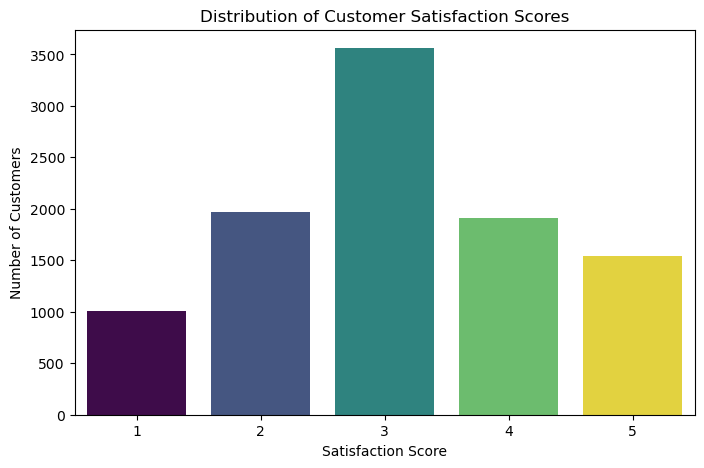

In [19]:
#Visualization

plt.figure(figsize=(8, 5))
# Assign x to hue and set legend=False to achieve the same coloring effect without the warning
sns.countplot(data=df, x='Customer_Satisfaction', hue='Customer_Satisfaction', palette='viridis', legend=False)
plt.title('Distribution of Customer Satisfaction Scores')
plt.xlabel('Satisfaction Score')
plt.ylabel('Number of Customers')
plt.show()

In [20]:
#Top Selling Product Categories by Net Revenue
category_revenue = df.groupby('Product_Category')['Net_Revenue'].sum().sort_values(ascending=False)
print("Top Product Categories by Net Revenue:")
print(category_revenue.head()) # Show top 5 categories

Top Product Categories by Net Revenue:
Product_Category
Books          985408.39
Electronics    981995.59
Fashion        980347.57
Beauty         973627.72
Home           957983.51
Name: Net_Revenue, dtype: float64


In [22]:
print(category_revenue)

Product_Category
Books          985408.39
Electronics    981995.59
Fashion        980347.57
Beauty         973627.72
Home           957983.51
Name: Net_Revenue, dtype: float64


In [24]:
print("Values being passed to the Y-axis of the bar plot:")
print(category_revenue.head().values)


Values being passed to the Y-axis of the bar plot:
[985408.39 981995.59 980347.57 973627.72 957983.51]


C:\Users\3LOK\AppData\Local\Temp\ipykernel_9380\2835310911.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=category_revenue.head().index, y=category_revenue.head().values, palette='Blues_d')


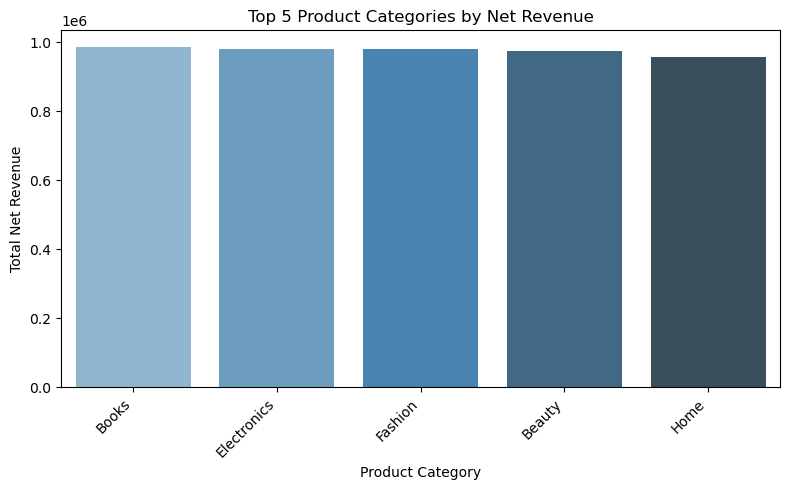

In [26]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
sns.barplot(x=category_revenue.head().index, y=category_revenue.head().values, palette='Blues_d')
plt.title('Top 5 Product Categories by Net Revenue')
plt.xlabel('Product Category')
plt.ylabel('Total Net Revenue')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [27]:
# First, ensure 'Purchase_Date' is the index to easily resample
df_time_series = df.set_index('Purchase_Date')

# Aggregate Net Revenue daily
daily_revenue = df_time_series['Net_Revenue'].resample('D').sum() # 'D' for daily
# If daily is too noisy, try monthly: daily_revenue = df_time_series['Net_Revenue'].resample('M').sum()

print("Daily Net Revenue (first few entries):")
print(daily_revenue.head())
print("\nDaily Net Revenue (last few entries):")
print(daily_revenue.tail())

Daily Net Revenue (first few entries):
Purchase_Date
2024-07-13    19823.34
2024-07-14    13649.39
2024-07-15    14260.13
2024-07-16    13239.03
2024-07-17    10446.77
Freq: D, Name: Net_Revenue, dtype: float64

Daily Net Revenue (last few entries):
Purchase_Date
2025-07-09    14444.31
2025-07-10    20002.50
2025-07-11    14580.54
2025-07-12    11140.92
2025-07-13    11827.94
Freq: D, Name: Net_Revenue, dtype: float64


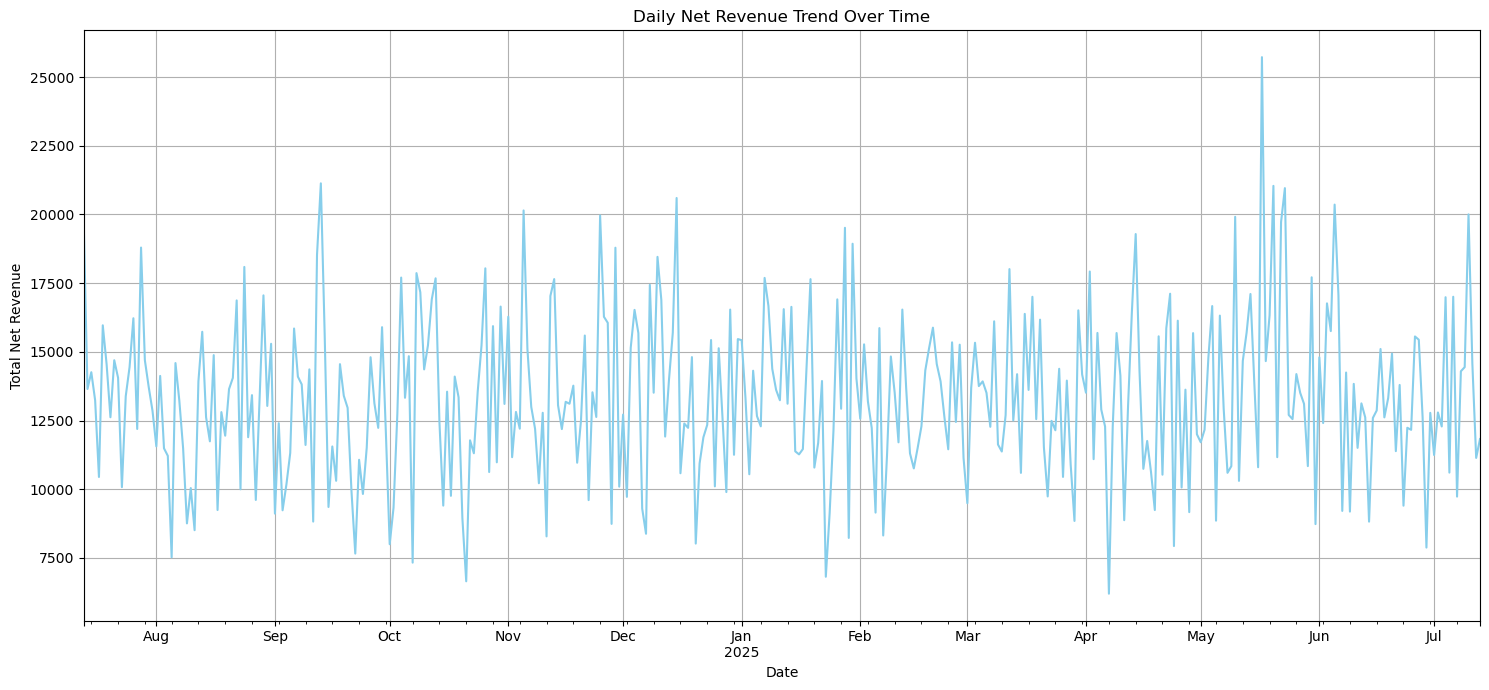

In [28]:
plt.figure(figsize=(15, 7)) # Larger figure for time series plot
daily_revenue.plot(kind='line', color='skyblue')
plt.title('Daily Net Revenue Trend Over Time')
plt.xlabel('Date')
plt.ylabel('Total Net Revenue')
plt.grid(True)
plt.tight_layout()
plt.show()

In [29]:
output_file_name = 'Retail_cleaned_dataset.xlsx' # You can change the name
df.to_excel(output_file_name, index=False) # index=False prevents writing the DataFrame index as a column
print(f"Cleaned data exported to {output_file_name}")

Cleaned data exported to Retail_cleaned_dataset.xlsx
